In [14]:
import numpy as np 
import pandas as pd 
import seaborn as sn
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime
from tabulate import tabulate
import seaborn as sns
from sklearn import model_selection
from sklearn.datasets import make_classification
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, make_scorer, f1_score
from sklearn.model_selection import GridSearchCV
import warnings
import timeit
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [3]:
#read dataset 
df = pd.read_csv('creditcard (2).csv')

## Exploratory Data Analysis 

In [4]:
#Describe dataset, look at the different columns 
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
#Check if there are any missing values in dataset 
df[df.isnull().any(axis='columns')]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


<AxesSubplot:>

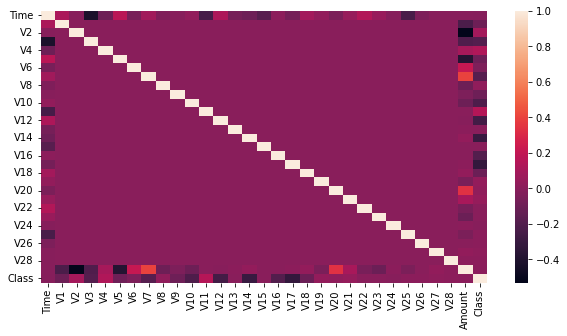

In [6]:
#correlation matrix
plt.figure(figsize=(10,5))
sns.heatmap(df.corr())

#### Features V1 - V28

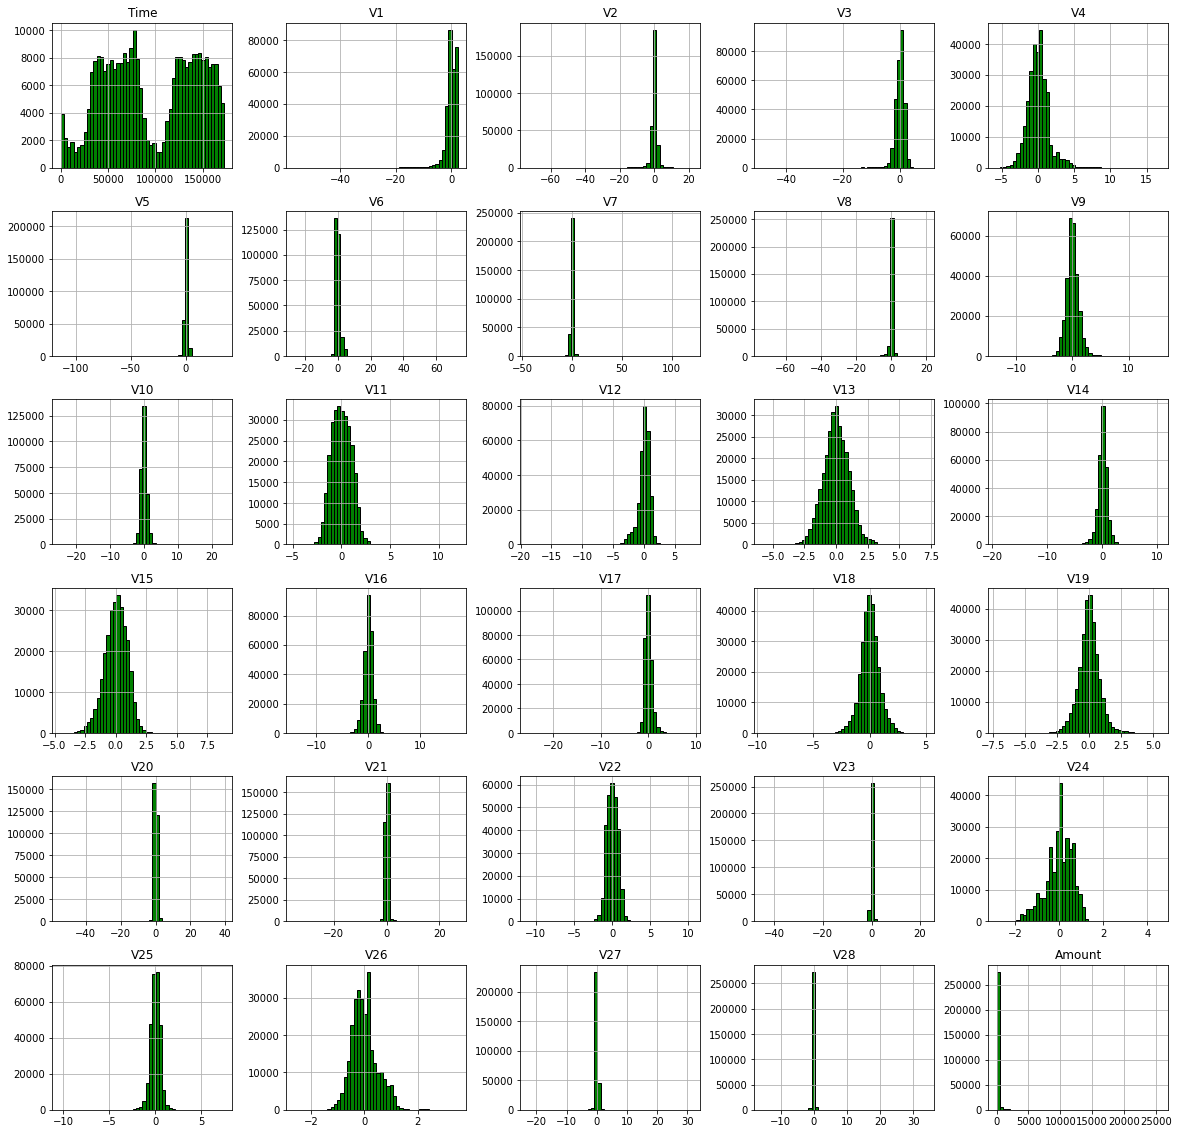

In [7]:
#Create histogram for all features 
df_hist = df.drop(['Class'], 1)
df_hist.hist(figsize=(20,20), bins = 50, color = "g", edgecolor='black')
plt.show()

### Class 

<function matplotlib.pyplot.show(close=None, block=None)>

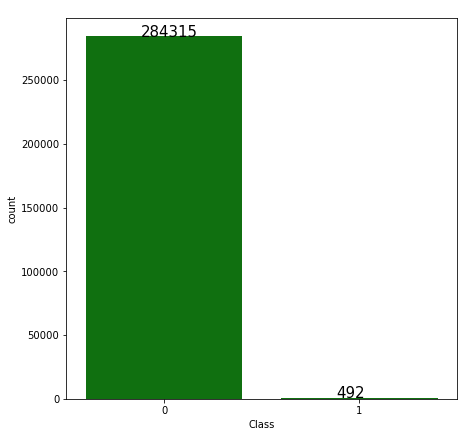

In [8]:
#Show class balance
plt.figure(figsize=(7,7))
fig = sns.countplot(x="Class", data=df, color="g")
for p in fig.patches:
    fig.annotate(f'\n{p.get_height()}', (p.get_x()+0.28, p.get_height()), size=15)
plt.show

### Time

<Figure size 1440x288 with 0 Axes>

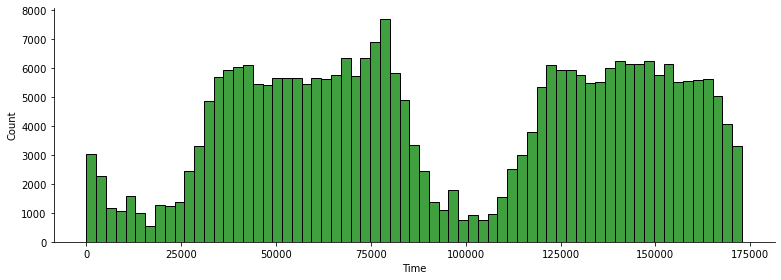

In [9]:
# Plot istribution of the Time variable, which contains transaction data for two days
plt.figure(figsize=(20,4))
fig = sns.displot(df['Time'], kde=False, color="g", height=4, aspect=11.7/4.27)
plt.show()

Text(0.5, 0.98, 'Transaction Amount over Time split by Class')

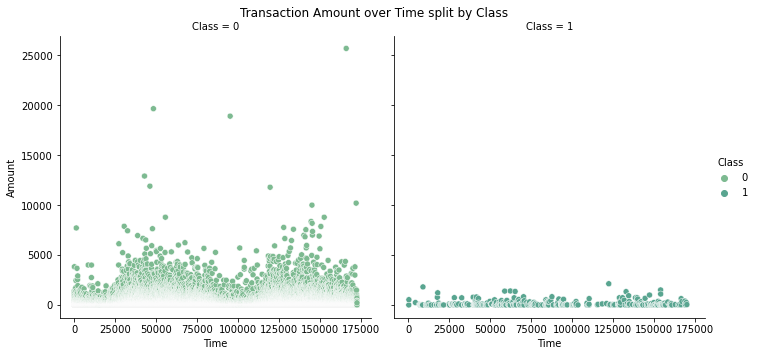

In [10]:
# Plot time against amount
sns.set_palette(sns.color_palette("crest"))
x = df['Time']
y = df['Amount']
rp = sns.relplot(data=df, x=x, y=y, col="Class", kind="scatter", hue="Class")
rp.fig.subplots_adjust(top=0.9)
rp.fig.suptitle('Transaction Amount over Time split by Class')

### Amount 

In [11]:
#Calculate the average amount for the different classes 
Average_fraudulent_amount = df.loc[df['Class'] == 1, 'Amount'].mean()
Average_nonfraudulent_amount = df.loc[df['Class'] == 0, 'Amount'].mean()

print('The average transaction amount of the fraudulent transactions =', Average_fraudulent_amount)
print('The average transaction amount of the non fraudulent transactions =', Average_nonfraudulent_amount)

The average transaction amount of the fraudulent transactions = 122.21132113821133
The average transaction amount of the non fraudulent transactions = 88.29102242225574


In [20]:
df1 = df[df['Class']==1]

###  Chi squared test

In [21]:
#chi2 independence for fraud vs amount
from scipy.stats import chi2_contingency
chi_p = []
for i in df.columns.tolist():
    data = pd.crosstab(df1[i], df1['Class'])
    _, p, _, _ = chi2_contingency(data)
#     chi_p.append(round(p,6))
    chi_p.append(p)    

In [22]:
chi_p

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [23]:
dic = {
    'feature' : df1.columns.tolist(),
    'p-value' : chi_p
}
chi_df = pd.DataFrame(dic)[:-1].sort_values(by = 'p-value').reset_index()
chi_df = chi_df.drop('index', axis=1)
print(tabulate(chi_df, headers = 'keys', tablefmt = 'psql'))

+----+-----------+-----------+
|    | feature   |   p-value |
|----+-----------+-----------|
|  0 | Time      |         1 |
|  1 | V27       |         1 |
|  2 | V26       |         1 |
|  3 | V25       |         1 |
|  4 | V24       |         1 |
|  5 | V23       |         1 |
|  6 | V22       |         1 |
|  7 | V21       |         1 |
|  8 | V20       |         1 |
|  9 | V19       |         1 |
| 10 | V18       |         1 |
| 11 | V17       |         1 |
| 12 | V16       |         1 |
| 13 | V15       |         1 |
| 14 | V14       |         1 |
| 15 | V13       |         1 |
| 16 | V12       |         1 |
| 17 | V11       |         1 |
| 18 | V10       |         1 |
| 19 | V9        |         1 |
| 20 | V8        |         1 |
| 21 | V7        |         1 |
| 22 | V6        |         1 |
| 23 | V5        |         1 |
| 24 | V4        |         1 |
| 25 | V3        |         1 |
| 26 | V2        |         1 |
| 27 | V1        |         1 |
| 28 | V28       |         1 |
| 29 | A

In [12]:
#chi2 independence for fraud vs time

In [13]:
# df['Amount-Bins'] = ''

In [14]:
def make_bins(predictor, size=50):
    '''
    Takes the predictor (a series or a dataframe of single predictor) and size of bins
    Returns bins and bin labels
    '''
    bins = np.linspace(predictor.min(), predictor.max(), num=size)

    bin_labels = []

    # Index of the final element in bins list
    bins_last_index = bins.shape[0] - 1

    for id, val in enumerate(bins):
        if id == bins_last_index:
            continue
        val_to_put = str(int(bins[id])) + ' to ' + str(int(bins[id + 1]))
        bin_labels.append(val_to_put)
    
    return bins, bin_labels

In [15]:
# bins, bin_labels = make_bins(df.Amount, size=10)

In [16]:

# df['Amount-Bins'] = pd.cut(df.Amount, bins=bins,
#                            labels=bin_labels, include_lowest=True)
# df['Amount-Bins'].head().to_frame()

In [17]:
# df['Amount-Bins'].value_counts()

In [18]:
# df_encoded = pd.get_dummies(data=df, columns=['Amount-Bins'])
# df = df_encoded.copy()
# df

In [19]:
X = df.drop(labels='Class', axis=1)
Y = df['Class']

X.shape, Y.shape

((284807, 30), (284807,))

In [20]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# mms = StandardScaler()
# X = mms.fit_transform(X)

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(
    X, Y, random_state=42, test_size=0.3, shuffle=True)

print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(199364, 30) (199364,)
(85443, 30) (85443,)


In [22]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [23]:
# # Training the algorithm
# lr_model.fit(xtrain, ytrain)

In [24]:
# # Predictions on training and testing data
# lr_pred_train = lr_model.predict(xtrain)
# lr_pred_test = lr_model.predict(xtest)

In [25]:
# Importing the required metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [26]:
# tn, fp, fn, tp = confusion_matrix(ytest, lr_pred_test).ravel()
# conf_matrix = pd.DataFrame(
#     {
#         'Predicted Fraud': [tp, fp],
#         'Predicted Not Fraud': [fn, tn]
#     }, index=['Fraud', 'Not Fraud'])
# conf_matrix

In [27]:
# print(classification_report(ytest, lr_pred_test))

## Isolation Forest

### Pre-processing

In [28]:
# Separate the classes from the train set
df_classes = df['Class']
df_train = df.drop(['Class'], axis=1)

# split the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(df_train, df_classes, test_size=0.30, random_state=42)

In [29]:
mms = StandardScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

In [30]:
fraud = df[df['Class'] == 1] # Number of fraudulent transactions
valid = df[df['Class']== 0] # Number of valid transactions
outlier_fraction = len(fraud)/float(len(valid))

In [31]:
# train the model on the nominal train set
# model_isf = IsolationForest(n_estimators=100, max_samples='auto', contamination='auto', \
#                         max_features=1.0, bootstrap=False, n_jobs=None, verbose=0, warm_start=False).fit(X_train)

model_isf = IsolationForest(max_samples = len(X_train),contamination = outlier_fraction).fit(X_train)

In [32]:
b = IsolationForest(contamination = outlier_fraction).fit(X_train) # Fitting the model.
# b = IsolationForest(n_estimators=100, max_samples='auto', contamination=outlier_fraction, \
#                         max_features=1.0).fit(X_train)
y_prediction2 = b.predict(X_test) # Prediction using trained model.
y_prediction2[y_prediction2 == 1] = 0 # Valid transactions are labelled as 0.
y_prediction2[y_prediction2 == -1] = 1 # Fraudulent transactions are labelled as 1.
errors2 = (y_prediction2 != y_test).sum() # Total number of errors is calculated.
print(errors2)
print(accuracy_score(y_prediction2,y_test))
print(classification_report(y_prediction2,y_test))

185
0.9978348138525098
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85290
           1       0.38      0.34      0.36       153

    accuracy                           1.00     85443
   macro avg       0.69      0.67      0.68     85443
weighted avg       1.00      1.00      1.00     85443



In [33]:
# # Predictions on training and testing data
# pred_train = model_isf.predict(xtrain)
# pred_test = model_isf.predict(xtest)

In [34]:
# print(classification_report(ytest, pred_test))

### Isolation Forest base model

Isolation Forest base model

Total number of errors:  185
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.34      0.38      0.36       136

    accuracy                           1.00     85443
   macro avg       0.67      0.69      0.68     85443
weighted avg       1.00      1.00      1.00     85443



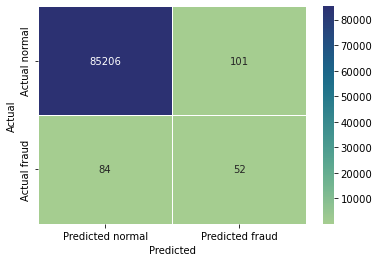

In [35]:
def measure_performance(model, X_test, y_true, map_labels):
    # predict on testset
    df_pred_test = X_test.copy()
    df_pred_test = pd.DataFrame(df_pred_test)
#     print(df_pred_test)
#     print(model.predict(X_test))
    df_pred_test['Pred'] = model.predict(X_test)
    if map_labels:
        df_pred_test['Pred'] = df_pred_test['Pred'].map({1: 0, -1: 1})
    

    # measure performance
    y_pred = df_pred_test['Pred'] 
    # Total error calculated
    errors = (y_pred.tolist() != y_true).sum() 
    print("\nTotal number of errors: ", errors)
    matrix = confusion_matrix(y_true, y_pred)

    sns.heatmap(pd.DataFrame(matrix, columns = ['Predicted', 'Actual']),
                xticklabels=['Predicted normal', 'Predicted fraud'], 
                yticklabels=['Actual normal', 'Actual fraud'], 
                annot=True, fmt="d", linewidths=.5, cmap="crest")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    
    print(classification_report(y_true, y_pred))

    model_score = f1_score(y_true, y_pred, average='macro')
    return model_score

model_name = 'Isolation Forest base'
print(f'{model_name} model')

map_labels = True
model_score = measure_performance(b, X_test, y_test, map_labels)


### Isolation Forest Hypertuning using grid search

In [36]:
# #define parameters
# warnings.filterwarnings('ignore')
# n_estimators= [50, 100, 200]
# max_samples= ['auto', 300]
# max_features= [0.5, 1.0, 1.5]
# contamination=['auto', 0.1, 0.2]

# param_grid = dict(n_estimators=n_estimators, max_features=max_features, max_samples=max_samples, contamination=contamination)

# clf = IsolationForest(n_estimators=n_estimators, 
#                             max_features=max_features, 
#                             max_samples=max_samples,
#                             contamination=contamination, 
#                             bootstrap=False, 
#                             n_jobs=-1)

# # Define a f1_scorer
# f1sc = make_scorer(f1_score, average='macro')

# #gridsearch
# grid = GridSearchCV(estimator=clf, param_grid=param_grid, scoring=f1sc, cv=3, refit=True, return_train_score=True)
# grid_results = grid.fit(X_train, y_train)

# model_name = 'Isolation Forest Hypertuned'
# print(f'{model_name} model')

# best_model = grid_results.best_estimator_
# map_labels = True
# model_score = measure_performance(best_model, X_test, y_test, map_labels)

# print('Best Hyperparameters: %s' % grid_results.best_params_)
# print('Best score:%s' % grid_results.best_score_)


### Isolation Forest Shuffle split Cross validation

In [37]:
#add shuffle split

#### Isolation Forest Smote for class imbalance

In [41]:
#add smote
def return_classification_report(model_isf, X_test, y_true, map_labels):
    # predict on testset
    df_pred_test = X_test.copy()
    df_pred_test = X_test.copy()
    df_pred_test = pd.DataFrame(df_pred_test)
    
    df_pred_test['Pred'] = model_isf.predict(X_test)
    if map_labels:
        df_pred_test['Pred'] = df_pred_test['Pred'].map({1: 0, -1: 1})

    # measure performance
    y_pred = df_pred_test['Pred'] 
     # Total error calculated
    errors = (y_pred.tolist() != y_true).sum() 
    print("Total number of errors: ", errors)
    print(" ")
    matrix = confusion_matrix(y_true, y_pred)

    report = classification_report(y_true, y_pred, output_dict=True)
    return report

#add smote 
# Separate the classes from the train set
from imblearn.over_sampling import SMOTE
from collections import Counter

df_classes = df['Class']
df_train = df.drop(['Class'], axis=1)

# split the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(df_train, df_classes, test_size=0.30, random_state=42)

print('Original dataset shape %s' % Counter(df_classes))
print(" ")


balancing_ratio = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

model_scores = {}

for ratio in balancing_ratio:
    sm = SMOTE(random_state=42, sampling_strategy=ratio)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
    print(f"Resampled dataset shape ({ratio}) {Counter(y_train_res)}")
#     print('Resampled dataset shape %s Balancing Ratio %i' % Counter(y_train_res), ratio)
    # train the model on the nominal train set
#     model_isf_Smote = IsolationForest(n_estimators=100, max_samples='auto', contamination='auto', \
#                             max_features=1.0, bootstrap=False, n_jobs=None, verbose=0, warm_start=False).fit(X_train_res)
    model_isf_Smote = IsolationForest(contamination = outlier_fraction).fit(X_train_res)
    

    map_labels = True
    #model_score[str(int(ratio))] = 
    a  = return_classification_report(model_isf_Smote, X_test, y_test, map_labels)
    model_scores[ratio] = a
    


Original dataset shape Counter({0: 284315, 1: 492})
 
Resampled dataset shape (0.1) Counter({0: 199008, 1: 19900})
Total number of errors:  133
 
Resampled dataset shape (0.2) Counter({0: 199008, 1: 39801})
Total number of errors:  132
 
Resampled dataset shape (0.3) Counter({0: 199008, 1: 59702})
Total number of errors:  134
 
Resampled dataset shape (0.4) Counter({0: 199008, 1: 79603})
Total number of errors:  133
 
Resampled dataset shape (0.5) Counter({0: 199008, 1: 99504})
Total number of errors:  135
 
Resampled dataset shape (0.6) Counter({0: 199008, 1: 119404})
Total number of errors:  141
 
Resampled dataset shape (0.7) Counter({0: 199008, 1: 139305})
Total number of errors:  136
 
Resampled dataset shape (0.8) Counter({0: 199008, 1: 159206})
Total number of errors:  135
 
Resampled dataset shape (0.9) Counter({0: 199008, 1: 179107})
Total number of errors:  137
 
Resampled dataset shape (1) Counter({0: 199008, 1: 199008})
Total number of errors:  140
 


In [42]:
[(ratio, 'precision: {0} Recall: {1} F1-score: {2}'.format(model_scores[ratio]['macro avg']['precision'],model_scores[ratio]['macro avg']['recall'],model_scores[ratio]['macro avg']['f1-score'])) for ratio in balancing_ratio]

[(0.1,
  'precision: 0.8325725121146148 Recall: 0.5220412399782378 F1-score: 0.5409898315436024'),
 (0.2,
  'precision: 0.999227519048678 Recall: 0.5147058823529411 F1-score: 0.5281848895016993'),
 (0.3,
  'precision: 0.8742216669202589 Recall: 0.5110235505809813 F1-score: 0.5210361757062705'),
 (0.4,
  'precision: 0.9992216760299626 Recall: 0.5110294117647058 F1-score: 0.5211932686978964'),
 (0.5,
  'precision: 0.8325491573033708 Recall: 0.507347079992746 F1-score: 0.5139931674753083'),
 (0.6,
  'precision: 0.6103268800087397 Recall: 0.5073119128903979 F1-score: 0.5133801973507364'),
 (0.7,
  'precision: 0.7492158147918397 Recall: 0.5073412188090213 F1-score: 0.5138874619108417'),
 (0.8,
  'precision: 0.8325491573033708 Recall: 0.507347079992746 F1-score: 0.5139931674753083'),
 (0.9,
  'precision: 0.6992158056134272 Recall: 0.5073353576252966 F1-score: 0.5137832141123724'),
 (1,
  'precision: 0.6242157780769005 Recall: 0.5073177740741226 F1-score: 0.5134789136045417')]

In [43]:
for i in balancing_ratio:
    print("="*100)
    print(f"\t\t\t\tBalancing Ratio: {int(i*100)}%")
    print("="*100)
    print(pd.DataFrame(model_scores[i]))
    print(" ")

				Balancing Ratio: 10%
                      0           1  accuracy     macro avg  weighted avg
precision      0.998478    0.666667  0.998443      0.832573      0.997950
recall         0.999965    0.044118  0.998443      0.522041      0.998443
f1-score       0.999221    0.082759  0.998443      0.540990      0.997762
support    85307.000000  136.000000  0.998443  85443.000000  85443.000000
 
				Balancing Ratio: 20%
                      0           1  accuracy     macro avg  weighted avg
precision      0.998455    1.000000  0.998455      0.999228      0.998457
recall         1.000000    0.029412  0.998455      0.514706      0.998455
f1-score       0.999227    0.057143  0.998455      0.528185      0.997727
support    85307.000000  136.000000  0.998455  85443.000000  85443.000000
 
				Balancing Ratio: 30%
                      0           1  accuracy     macro avg  weighted avg
precision      0.998443    0.750000  0.998432      0.874222      0.998048
recall         0.999988    0.0220